## Scatter Matrix

In [1]:
import pandas as pd
import sqlite3
from pandas.plotting import scatter_matrix

### Connection to sqlite3

In [2]:
conn = sqlite3.connect("../ex00/data/checking-logs.sqlite") 

### Dataframe

In [3]:
query1 = """
SELECT 
    c.uid, 
    c.labname, 
    datetime(c.timestamp) AS first_commit_ts, 
    datetime(MIN(p.datetime)) AS first_view_ts
FROM checker c
LEFT JOIN pageviews AS p 
    ON c.uid = p.uid
WHERE c.status = 'ready'
AND c.numTrials = 1
AND c.labname IN ('laba04', 'laba04s', 'laba05', 'laba06', 'laba06s')
AND c.uid LIKE 'user_%'
GROUP BY c.uid, c.labname;
"""

datamart = pd.read_sql(query1, conn, parse_dates=["first_commit_ts", "first_view_ts"])
datamart.to_sql("datamart", conn, if_exists="replace", index=False)
views_diff = pd.read_sql(query1, conn)
views_diff

,uid,labname,first_commit_ts,first_view_ts
0,user_1,laba04,2020-04-26 17:06:18,2020-04-26 21:53:59
1,user_1,laba04s,2020-04-26 17:12:11,2020-04-26 21:53:59
2,user_1,laba05,2020-05-02 19:15:18,2020-04-26 21:53:59
3,user_1,laba06,2020-05-17 16:26:35,2020-04-26 21:53:59
4,user_1,laba06s,2020-05-20 12:23:37,2020-04-26 21:53:59
...,...,...,...,...
109,user_8,laba04,2020-04-18 21:53:36,None
110,user_8,laba04s,2020-04-19 10:22:35,None
111,user_8,laba05,2020-05-02 13:28:07,None
112,user_8,laba06,2020-05-16 17:56:15,None


In [4]:
datamart = pd.read_sql("SELECT * FROM datamart;", conn, parse_dates=["first_commit_ts", "first_view_ts"])
datamart

,uid,labname,first_commit_ts,first_view_ts
0,user_1,laba04,2020-04-26 17:06:18,2020-04-26 21:53:59
1,user_1,laba04s,2020-04-26 17:12:11,2020-04-26 21:53:59
2,user_1,laba05,2020-05-02 19:15:18,2020-04-26 21:53:59
3,user_1,laba06,2020-05-17 16:26:35,2020-04-26 21:53:59
4,user_1,laba06s,2020-05-20 12:23:37,2020-04-26 21:53:59
...,...,...,...,...
109,user_8,laba04,2020-04-18 21:53:36,NaT
110,user_8,laba04s,2020-04-19 10:22:35,NaT
111,user_8,laba05,2020-05-02 13:28:07,NaT
112,user_8,laba06,2020-05-16 17:56:15,NaT


In [5]:
test = datamart[datamart["first_view_ts"].notna()].copy()
test

,uid,labname,first_commit_ts,first_view_ts
0,user_1,laba04,2020-04-26 17:06:18,2020-04-26 21:53:59
1,user_1,laba04s,2020-04-26 17:12:11,2020-04-26 21:53:59
2,user_1,laba05,2020-05-02 19:15:18,2020-04-26 21:53:59
3,user_1,laba06,2020-05-17 16:26:35,2020-04-26 21:53:59
4,user_1,laba06s,2020-05-20 12:23:37,2020-04-26 21:53:59
5,user_10,laba04,2020-04-25 08:24:52,2020-04-18 12:19:50
6,user_10,laba04s,2020-04-25 08:37:54,2020-04-18 12:19:50
7,user_10,laba05,2020-05-01 19:27:26,2020-04-18 12:19:50
8,user_10,laba06,2020-05-19 11:39:28,2020-04-18 12:19:50
9,user_10,laba06s,2020-05-20 07:37:31,2020-04-18 12:19:50


In [6]:
test.to_sql("test", conn, if_exists="replace", index=False)
test['first_commit_ts'] = test['first_commit_ts'].dt.date
test['first_view_ts'] = test['first_view_ts'].dt.date
test

,uid,labname,first_commit_ts,first_view_ts
0,user_1,laba04,2020-04-26,2020-04-26
1,user_1,laba04s,2020-04-26,2020-04-26
2,user_1,laba05,2020-05-02,2020-04-26
3,user_1,laba06,2020-05-17,2020-04-26
4,user_1,laba06s,2020-05-20,2020-04-26
5,user_10,laba04,2020-04-25,2020-04-18
6,user_10,laba04s,2020-04-25,2020-04-18
7,user_10,laba05,2020-05-01,2020-04-18
8,user_10,laba06,2020-05-19,2020-04-18
9,user_10,laba06s,2020-05-20,2020-04-18


### take the number of commits from the checker table

In [7]:
query_c = """
SELECT uid, COUNT(timestamp) as num_commits 
FROM checker
WHERE uid like 'user_%' AND labname NOT like 'project1' 
GROUP BY uid"""
num_c = pd.read_sql(query_c, conn)
num_c

,uid,num_commits
0,user_0,3
1,user_1,62
2,user_10,20
3,user_11,7
4,user_12,86
5,user_13,52
6,user_14,61
7,user_15,23
8,user_16,41
9,user_17,51


In [8]:
query_pages = """
SELECT uid, COUNT(datetime) as pageviews
FROM pageviews 
WHERE uid like 'user_%' 
GROUP BY uid"""
pagev = pd.read_sql(query_pages, conn)
pagev

,uid,pageviews
0,user_1,28
1,user_10,89
2,user_14,143
3,user_17,47
4,user_18,3
5,user_19,16
6,user_21,10
7,user_25,179
8,user_28,149
9,user_3,317


In [9]:
query = """
SELECT 
    test.uid,
    AVG((unixepoch(test.first_commit_ts) - d.deadlines) / 3600) AS avg_diff
FROM test
JOIN deadlines AS d ON test.labname = d.labs
JOIN pageviews ON pageviews.uid = test.uid
GROUP BY test.uid;
"""
# unixepoch sanani soniyalarga aylantiradi
views_diff = pd.read_sql(query, conn)
views_diff

,uid,avg_diff
0,user_1,-64.400000
1,user_10,-74.800000
2,user_14,-159.000000
3,user_17,-61.600000
4,user_18,-5.666667
5,user_19,-98.750000
6,user_21,-95.500000
7,user_25,-92.600000
8,user_28,-86.400000
9,user_3,-105.400000


In [10]:
df = views_diff.merge(pagev, on='uid', how='inner').merge(num_c, on='uid', how='inner')
df.drop(columns=['uid'], inplace=True)
df

,avg_diff,pageviews,num_commits
0,-64.400000,28,62
1,-74.800000,89,20
2,-159.000000,143,61
3,-61.600000,47,51
4,-5.666667,3,5
5,-98.750000,16,118
6,-95.500000,10,65
7,-92.600000,179,79
8,-86.400000,149,60
9,-105.400000,317,18


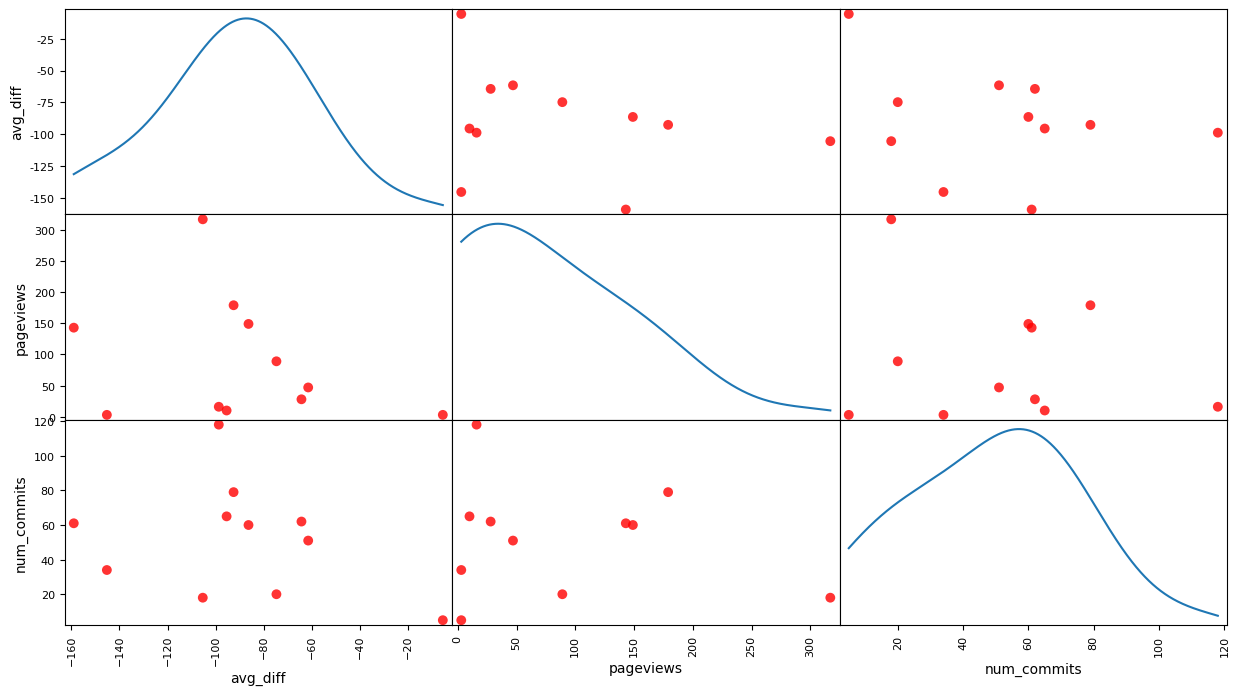

In [11]:
scatter_matrix(
    df,
    alpha=0.8,
    figsize=(15, 8),
    diagonal='kde',
    color='red',
    hist_kwds={'linewidth': 3},
    s=200
);

### Connection closed

In [12]:
conn.close()

### Answer the questions

- **Can we say that if a user has a low number of pageviews then they likely have a low number of commits?** - `No`
- **Can we say that if a user has a low number of pageviews then they likely have a small average difference between the first commit and the lab deadline?** - `No`
- **Can we say that there are many users with a low number of commits and a few with a high number of commits?** - `Yes`
- **Can we say that there are many users with a small average difference and a few with a large average difference?** - `No`